In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = '/content/drive/MyDrive/Brain Tumour/archive (9).zip (Unzipped Files)/Training/'
test_dir = '/content/drive/MyDrive/Brain Tumour/archive (9).zip (Unzipped Files)/Testing/'


classes = ['glioma', 'meningioma', 'notumor', 'pituitary']


train_datagen = ImageDataGenerator(rescale=1./255)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        classes=classes)


validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=8,
        class_mode='categorical',
        classes=classes)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/18
178/178 [==============================] - 1783s 10s/step - loss: 1.0050 - accuracy: 0.7841 - val_loss: 0.4687 - val_accuracy: 0.8070
Epoch 2/18
178/178 [==============================] - 330s 2s/step - loss: 0.3162 - accuracy: 0.8815 - val_loss: 0.3776 - val_accuracy: 0.8658
Epoch 3/18
178/178 [==============================] - 302s 2s/step - loss: 0.2547 - accuracy: 0.8997 - val_loss: 0.3018 - val_accuracy: 0.8795
Epoch 4/18
178/178 [==============================] - 329s 2s/step - loss: 0.1872 - accuracy: 0.9301 - val_loss: 0.2369 - val_accuracy: 0.9062
Epoch 5/18
178/178 [==============================] - 327s 2s/step - loss: 0.1853 - accuracy: 0.9244 - val_loss: 0.2642 - val_accuracy: 0.9001
Epoch 6/18
178/178 [==============================] - 329s 2s/step - loss: 0.1252 - accuracy: 0.9561 - val_loss: 0.2645 - val_accuracy: 0.9016
Epoch 7/18
178/178 [==============================] - 330s 2s/step - loss: 

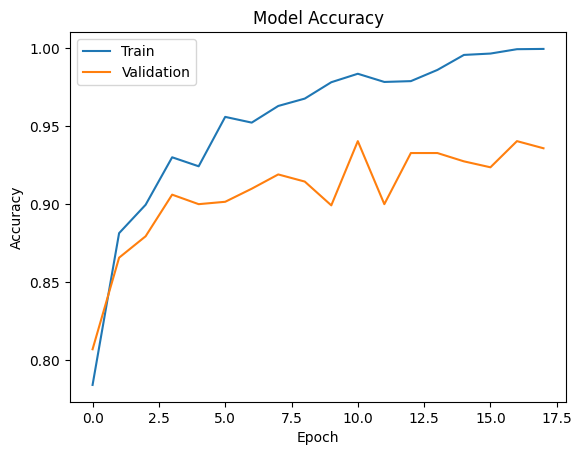

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD


base_model = InceptionV3(weights='imagenet', include_top=False)


x = base_model.output
x = GlobalAveragePooling2D()(x)


x = Dense(1024, activation='relu')(x)


predictions = Dense(len(classes), activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=18,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
import seaborn as sns


In [ ]:
from keras.utils import to_categorical

# Assuming validation_generator.labels contains class labels
num_classes = len(classes)  # Number of classes in your dataset
validation_labels_categorical = to_categorical(validation_generator.labels, num_classes=num_classes)


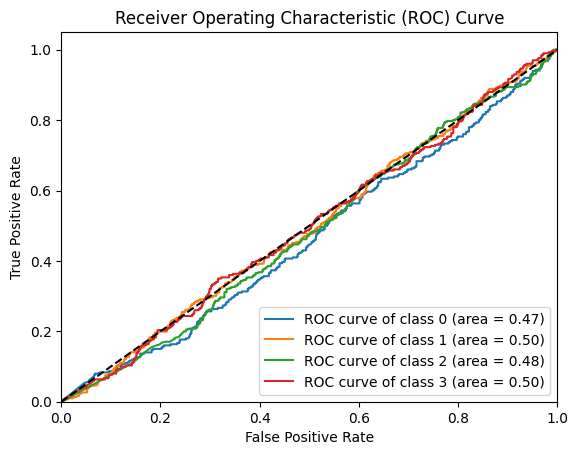

In [ ]:
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(validation_labels_categorical[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
